In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import scipy

In [21]:
def fit_parabola(x, y):
    # Construct the coefficient matrix
    A = np.vstack([x**2, x, np.ones_like(x)]).T
    
    # Solve the system of equations
    a, b, c = np.linalg.lstsq(A, y, rcond=None)[0]
    
    return a, b, c

posterior integral: 0.00027948055476836935
posterior integral: 0.00027948055476836935
zero fitted error: 0.8952890848212723
max fitted error: 0.9891793519077848


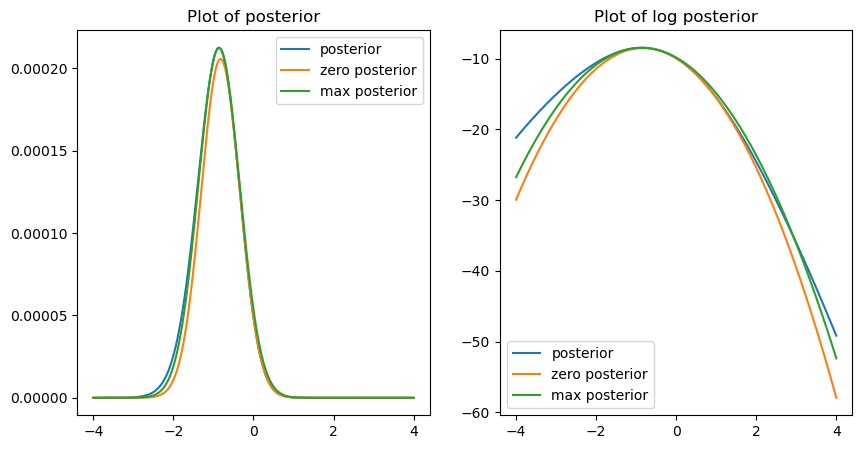

In [53]:
# Define the functions
def posterior(mean, sigma, alpha, beta):
    return np.exp(-(x-mean)**2/2*sigma**2)/(np.sqrt(2*np.pi*sigma)*(1+np.exp(-x))**alpha*(1+np.exp(x))**beta)

# Generate x values
x = np.linspace(-4,4,1000)

# Calculate y values for each function
y = posterior(mean=0, sigma=1, alpha=3, beta=10)
# a,b,c = fit_parabola(x[:3], np.log(y[:3]))
# left_fitted_parabola = a*x**2 + b*x + c
# a,b,c = fit_parabola(x[-3:], np.log(y[-3:]))
# right_fitted_parabola = a*x**2 + b*x + c
a,b,c = fit_parabola(x[498:501], np.log(y[498:501]))
zero_fitted_parabola = a*x**2 + b*x + c
a,b,c = fit_parabola(x[np.argmax(y)-1:np.argmax(y)+2], np.log(y[np.argmax(y)-1:np.argmax(y)+2]))
max_fitted_parabola = a*x**2 + b*x + c

# Approximate the integral for each function
posterior_integral = np.trapz(y, x)
# left_fitted_integral = np.trapz(np.exp(left_fitted_parabola), x)
# right_fitted_integral = np.trapz(np.exp(right_fitted_parabola), x)
zero_fitted_integral = np.trapz(np.exp(zero_fitted_parabola), x)
print('posterior integral:', posterior_integral)
max_fitted_integral = np.trapz(np.exp(max_fitted_parabola), x)
print('posterior integral:', posterior_integral)
# print('left fitted error:', left_fitted_integral/posterior_integral)
# print('right fitted error:', right_fitted_integral/posterior_integral)
print('zero fitted error:', zero_fitted_integral/posterior_integral)
print('max fitted error:', max_fitted_integral/posterior_integral)

# Create figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot sin(x) in the first subplot
axs[0].plot(x, y, label = 'posterior')
# axs[0].plot(x, np.exp(left_fitted_parabola), label = 'left posterior')
# axs[0].plot(x, np.exp(right_fitted_parabola), label = 'right posterior')
axs[0].plot(x, np.exp(zero_fitted_parabola), label = 'zero posterior')
axs[0].plot(x, np.exp(max_fitted_parabola), label = 'max posterior')
axs[0].set_title('Plot of posterior')
# axs[0].text(0,-1, f'Integral: {posterior_integral:.2f}', fontsize=10, color='blue')
axs[0].legend()

# Plot cos(x) in the second subplot
axs[1].plot(x, np.log(y), label = 'posterior')
# axs[1].plot(x, left_fitted_parabola, label = 'left posterior')
# axs[1].plot(x, right_fitted_parabola, label = 'right posterior')
axs[1].plot(x, zero_fitted_parabola, label = 'zero posterior')
axs[1].plot(x, max_fitted_parabola, label = 'max posterior')
axs[1].set_title('Plot of log posterior')
# axs[1].text(1.5*np.pi, -0.5, f'Integral: {integral_g:.2f}', fontsize=10, color='orange')
axs[1].legend()

# Show plot
plt.show()


In [59]:
true_log_int = np.log(np.trapz(y, x))
best_error = float('inf')
for i in range(len(x)-2):
    a,b,c = fit_parabola(x[i:i+2],y[i:i+2])
    fitted_parabola = a*x**2 + b*x + c
    pdf = np.exp(fitted_parabola)
    integral = np.trapz(pdf, x)
    error = abs(true_log_int- np.log(integral))
    if error < best_error:
        best_error = error
        best_int = integral
        best_pdf = pdf
        best_coefficients = a,b,c
        best_index = i
print('best_error:',best_error)
print('best_int:',best_int)
print('best_pdf:',best_pdf)
print('best_coefficients:',best_coefficients)
print('best_index:',best_index)

best_error: 3.953515407508653
best_int: 8.684052544784219
best_pdf: [0.53314707 0.53592155 0.53869984 0.54148185 0.54426749 0.54705667
 0.54984929 0.55264526 0.55544449 0.55824688 0.56105234 0.56386077
 0.56667208 0.56948617 0.57230295 0.57512231 0.57794415 0.58076838
 0.58359489 0.5864236  0.58925438 0.59208715 0.5949218  0.59775822
 0.60059632 0.60343598 0.60627711 0.6091196  0.61196334 0.61480822
 0.61765414 0.62050099 0.62334867 0.62619706 0.62904605 0.63189554
 0.63474541 0.63759555 0.64044585 0.6432962  0.64614649 0.6489966
 0.65184642 0.65469584 0.65754474 0.66039301 0.66324053 0.66608718
 0.66893285 0.67177742 0.67462078 0.67746281 0.68030339 0.68314239
 0.68597971 0.68881523 0.69164882 0.69448036 0.69730973 0.70013682
 0.70296149 0.70578364 0.70860314 0.71141986 0.71423369 0.7170445
 0.71985216 0.72265656 0.72545758 0.72825508 0.73104894 0.73383904
 0.73662526 0.73940746 0.74218553 0.74495934 0.74772876 0.75049367
 0.75325394 0.75600944 0.75876006 0.76150565 0.7642461  0.76698

In [60]:
best_int/posterior_integral

31072.117171019192

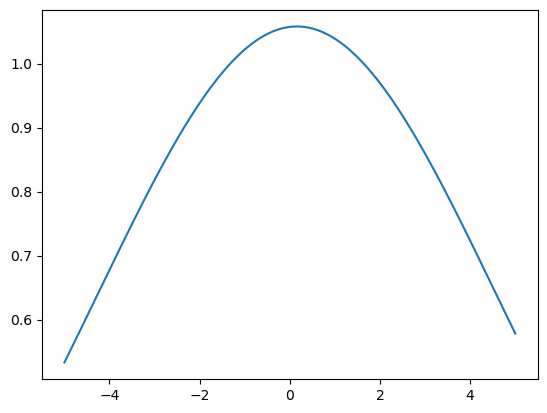

In [61]:
plt.plot(x, best_pdf)

In [95]:
import scipy
x=np.arange(0,10,.01) + .01
x


array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,
        0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,  0.81,
        0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.9 ,
        0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99,
        1.  ,  1.01,  1.02,  1.03,  1.04,  1.05,  1.06,  1.07,  1.08,
        1.09,  1.1 ,  1.11,  1.12,  1.13,  1.14,  1.15,  1.16,  1.17,
        1.18,  1.19,  1.2 ,  1.21,  1.22,  1.23,  1.24,  1.25,  1.26,
        1.27,  1.28,

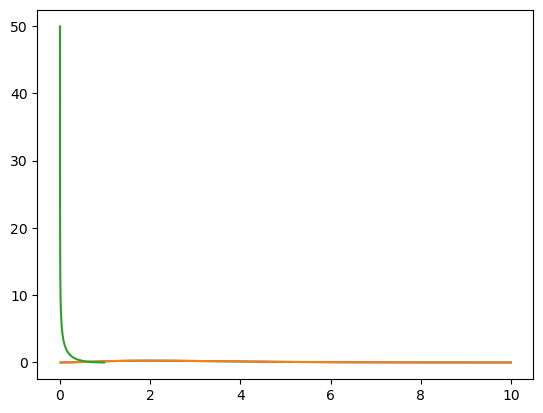

In [96]:
pdf = scipy.stats.gamma.pdf(x, 3)
cdf = scipy.stats.gamma.cdf(x, 3)
plt.plot(x,pdf)
plt.plot(x[1:], np.diff(cdf)/np.diff(x))
plt.plot(np.exp(-x[1:]),abs(np.diff(cdf)/np.diff(np.exp(-x))) )

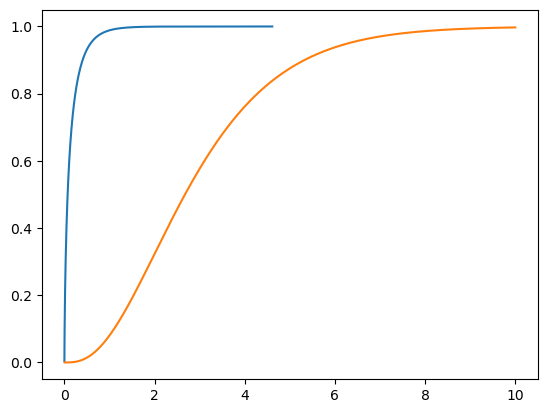

In [97]:
plt.plot(-np.log(1-np.exp(-x)), 1-cdf)
plt.plot(x, cdf)

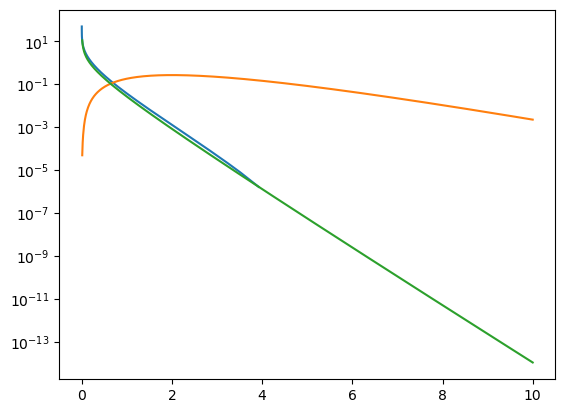

In [117]:
plt.plot(-np.log(1-np.exp(-x[1:])), np.diff(1-cdf)/np.diff(-np.log(1-np.exp(-x))))
plt.plot(x, pdf)
plt.plot(x, scipy.stats.gamma.pdf(x, 1/3, scale=1/3))
plt.yscale('log')

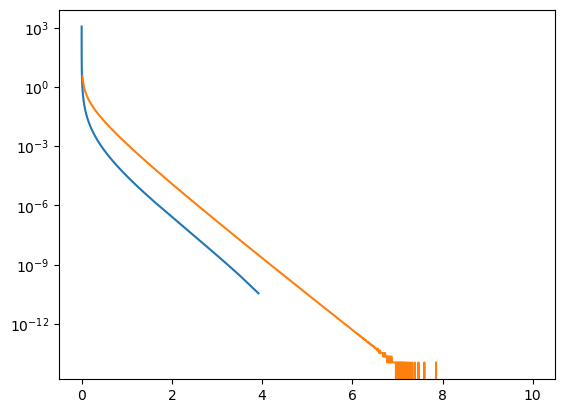

In [151]:
shape = 4
scale = 4
cdf = scipy.stats.gamma.cdf(x, shape, scale=scale)
plt.plot(-np.log(1-np.exp(-x[1:]))-.005, np.diff(1-cdf)/np.diff(-np.log(1-np.exp(-x))))
plt.plot(x[1:]-.005, np.diff(scipy.stats.gamma.cdf(x, 1/(scale*shape), scale=1/shape))/np.diff(x))
plt.yscale('log')

In [326]:
np.random.random(10)

array([0.60696892, 0.75766533, 0.86891485, 0.99109368, 0.01344454,
       0.85291882, 0.63759453, 0.94071992, 0.16645334, 0.68011793])

[ 26.42821402 103.71642178 123.51021734  56.72910592]
[ 13.98535849   1.09813644 113.76059126 248.91379698]
29.846800949539364
447.5517556043131


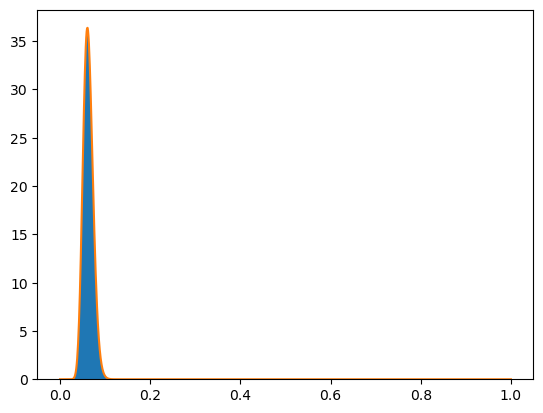

In [70]:
# alpha = np.array([778,43, 23])
# beta = np.array([567, 57, 12])
dim = 4
alpha, beta = (np.random.randn(dim)*10)**2+1, (np.random.randn(dim)*10)**2+1
print(alpha)
print(beta)
S = np.prod(alpha/(alpha+beta))
R = np.prod((alpha+1)/(alpha+beta+1))
alpha_approx = S*(1-R)/(R-S)
beta_approx = (1-S)*(1-R)/(R-S)
print(alpha_approx)
print(beta_approx)
x=np.linspace(0,1,1000)
plt.hist(np.prod(scipy.stats.beta.rvs(alpha, beta, size=(100000,len(alpha))),axis=-1), bins=100, density=True)
plt.plot(x, scipy.stats.beta.pdf(x, alpha_approx, beta_approx))

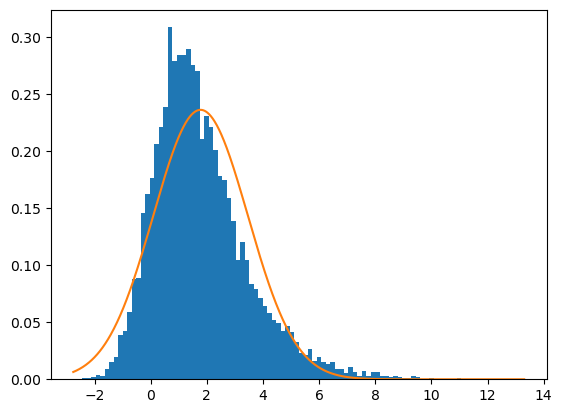

In [63]:
samples = 10000
theta = np.array([[0,1],[1,2],[2,3]])
x = scipy.stats.norm.rvs(*theta.transpose(), size=(samples, len(theta)))
new_x = np.log(np.exp(np.log(1+np.exp(-x)).sum(axis=-1))-1)
p, hist_x, _ = plt.hist(new_x, bins=100, density=True)
density_x = np.linspace(hist_x[0], hist_x[-1], 1000)
mom_density = scipy.stats.norm.pdf(density_x, loc = new_x.mean(), scale = new_x.std())
plt.plot(density_x, mom_density)
plt.show()

In [636]:
w_1, w_2, mu, var = torch.randn(100), torch.randn(100), torch.randn(100), torch.square(torch.randn(100))
a, b_1, b_2 = torch.exp(mu), torch.exp(w_1), torch.exp(w_2)
c_1, c_2 = a*b_1, a*b_2
d_1, d_2 = 1+c_1, c+c_2
k = (c_1/d_1**2-c_2/d_2**2)
mu_out = torch.log((1+b_2)*d_1/((1+b_1)*d_2))
var_out = var*((c_1-c_2)/(d_1*d_2))**2 + var**2*k**2/4
mu_out

tensor([ 1.0293,  0.1486,  0.2704,  1.1529,  1.4915,  2.1985,  2.3430,  0.2744,
         0.3168,  1.2240,  1.3995,  1.1186,  0.8256,  0.6022,  0.3600,  0.2917,
         1.5204,  0.2421,  1.1603,  0.4299,  1.5546,  1.6558,  0.2238,  0.7262,
         0.5082,  0.3467, -0.3212, -0.3439,  1.2775,  3.2630,  1.4283,  0.5838,
         0.2000,  0.4316,  0.4283,  0.5832,  0.4808,  0.6865,  1.3803,  0.3083,
         1.7086,  0.0695,  1.7304,  1.2114,  0.2877,  1.3590,  0.2018,  1.0615,
         1.3296,  0.1017,  0.1222,  0.8495,  1.5603,  0.5891,  1.3487, -0.0564,
         0.4386,  1.1960,  0.5573,  1.2370,  0.5497,  1.9035,  1.1688,  0.5304,
         0.1098,  0.2202,  0.9448,  1.7507,  2.3909,  0.7061,  0.7967,  2.9265,
         1.1233,  3.2951,  0.3718,  0.6393,  1.3817, -0.1909,  0.5099,  1.3016,
         0.9871,  0.4717,  0.4390, -0.0124,  0.4764,  2.0815,  0.7955,  0.6262,
        -0.1552, -0.1155,  0.9767,  2.0417,  2.1109,  1.3295,  0.9533,  1.4849,
         0.7989,  0.2425,  1.0705,  1.69

In [678]:
import sympy

mu_x, mu_1, mu_2 = sympy.symbols('\mu_x \mu_1 \mu_2')
sigma_x, sigma_1, sigma_2 = sympy.symbols('\sigma_x \sigma_1 \sigma_2')
x, w_1, w_2 = sympy.symbols('x w_1 w_2')
z_1, z_2, z_x = sympy.symbols('z_1 z_2 z_x')
def mean_approx(mean, var):
    return sympy.log(sympy.exp(mean)+1) + var*sympy.exp(mean)/(2*(sympy.exp(mean)+1)**2)
    # return var*sympy.exp(mean)/(2*(sympy.exp(mean)+1)**2)

def approx(mean, x):
    return sympy.log(sympy.exp(mean)+1) + (x-mean)*sympy.exp(mean)/(1+sympy.exp(mean)) + (x-mean)**2*sympy.exp(mean)/(2*(sympy.exp(mean)+1)**2)

mu_out = mean_approx(mu_2, sigma_2**2) + mean_approx(mu_1 + mu_x, sigma_1**2+sigma_x**2) -(mean_approx(mu_1, sigma_1**2) + mean_approx(mu_2 + mu_x, sigma_2**2+sigma_x**2))
mu_out

-\sigma_1**2*exp(\mu_1)/(2*(exp(\mu_1) + 1)**2) + \sigma_2**2*exp(\mu_2)/(2*(exp(\mu_2) + 1)**2) + (\sigma_1**2 + \sigma_x**2)*exp(\mu_1 + \mu_x)/(2*(exp(\mu_1 + \mu_x) + 1)**2) - (\sigma_2**2 + \sigma_x**2)*exp(\mu_2 + \mu_x)/(2*(exp(\mu_2 + \mu_x) + 1)**2) - log(exp(\mu_1) + 1) + log(exp(\mu_2) + 1) + log(exp(\mu_1 + \mu_x) + 1) - log(exp(\mu_2 + \mu_x) + 1)

In [686]:
centered_approx = approx(mu_2, w_2) + approx(mu_1+mu_x, w_1+x) - approx(mu_1,w_1)-approx(mu_2+mu_x, w_2+x)-mu_out
centered_approx = centered_approx.subs(w_1, z_1+mu_1).subs(w_2, z_2+mu_2).subs(x, z_x+mu_x)
centered_approx

\sigma_1**2*exp(\mu_1)/(2*(exp(\mu_1) + 1)**2) - \sigma_2**2*exp(\mu_2)/(2*(exp(\mu_2) + 1)**2) - z_1**2*exp(\mu_1)/(2*(exp(\mu_1) + 1)**2) - z_1*exp(\mu_1)/(exp(\mu_1) + 1) + z_2**2*exp(\mu_2)/(2*(exp(\mu_2) + 1)**2) + z_2*exp(\mu_2)/(exp(\mu_2) + 1) - (\sigma_1**2 + \sigma_x**2)*exp(\mu_1 + \mu_x)/(2*(exp(\mu_1 + \mu_x) + 1)**2) + (\sigma_2**2 + \sigma_x**2)*exp(\mu_2 + \mu_x)/(2*(exp(\mu_2 + \mu_x) + 1)**2) + (z_1 + z_x)**2*exp(\mu_1 + \mu_x)/(2*(exp(\mu_1 + \mu_x) + 1)**2) + (z_1 + z_x)*exp(\mu_1 + \mu_x)/(exp(\mu_1 + \mu_x) + 1) - (z_2 + z_x)**2*exp(\mu_2 + \mu_x)/(2*(exp(\mu_2 + \mu_x) + 1)**2) - (z_2 + z_x)*exp(\mu_2 + \mu_x)/(exp(\mu_2 + \mu_x) + 1)

In [733]:
squared_centered_approx = centered_approx**2- sigma_2**2*sympy.exp(2*mu_2)/(sympy.exp(mu_2)+1)**2 - (sigma_1**2+sigma_x**2)*((sympy.exp(mu_1+mu_x))/(sympy.exp(mu_1+mu_x)+1))**2 - sigma_1**2*sympy.exp(2*mu_1)/(sympy.exp(mu_1)+1)**2 - (sigma_2**2+sigma_x**2)*((sympy.exp(mu_2+mu_x))/(sympy.exp(mu_2+mu_x)+1))**2 - 2*sigma_2**4*sympy.exp(2*mu_2)/(4*(sympy.exp(mu_2)+1)**4) - 2*(sigma_1**2 + sigma_x**2)**2*sympy.exp(2*mu_1+2*mu_x)/(4*(sympy.exp(mu_1+mu_x)+1)**4) - 2*sigma_1**4*sympy.exp(2*mu_1)/(4*(sympy.exp(mu_1)+1)**4) - 2*(sigma_2**2 + sigma_x**2)**2*sympy.exp(2*mu_2+2*mu_x)/(4*(sympy.exp(mu_2+mu_x)+1)**4)
expectation = (sympy.expand(squared_centered_approx).subs(z_1**4, 3*sigma_1**4).subs(z_1**3, 0).subs(z_1**2, sigma_1**2).subs(z_1,0)
                                               .subs(z_2**4, 3*sigma_2**4).subs(z_2**3, 0).subs(z_2**2, sigma_2**2).subs(z_2,0)
                                               .subs(z_x**4, 3*sigma_x**4).subs(z_x**3, 0).subs(z_x**2, sigma_x**2).subs(z_x,0))
simplified_terms = [sympy.factor(term) for term in expectation.args]

# Recombine the terms
expectation = sum(simplified_terms)
expectation 

-\sigma_1**4*exp(2*\mu_1)*exp(\mu_x)/((exp(\mu_1)*exp(\mu_x) + 1)**2*(exp(\mu_1) + 1)**2) - 2*\sigma_1**2*exp(2*\mu_1)*exp(\mu_x)/((exp(\mu_1)*exp(\mu_x) + 1)*(exp(\mu_1) + 1)) - \sigma_2**4*exp(2*\mu_2)*exp(\mu_x)/((exp(\mu_2)*exp(\mu_x) + 1)**2*(exp(\mu_2) + 1)**2) - 2*\sigma_2**2*exp(2*\mu_2)*exp(\mu_x)/((exp(\mu_2)*exp(\mu_x) + 1)*(exp(\mu_2) + 1)) - \sigma_x**4*exp(\mu_1)*exp(\mu_2)*exp(2*\mu_x)/((exp(\mu_1)*exp(\mu_x) + 1)**2*(exp(\mu_2)*exp(\mu_x) + 1)**2) - 2*\sigma_x**2*exp(\mu_1)*exp(\mu_2)*exp(2*\mu_x)/((exp(\mu_1)*exp(\mu_x) + 1)*(exp(\mu_2)*exp(\mu_x) + 1))

In [744]:
def logistic(x):
    return torch.log(x/(1-x))

tensor([[0.0653, 0.2211, 0.0393]])
tensor([[0.0224, 0.0540, 0.0024]])


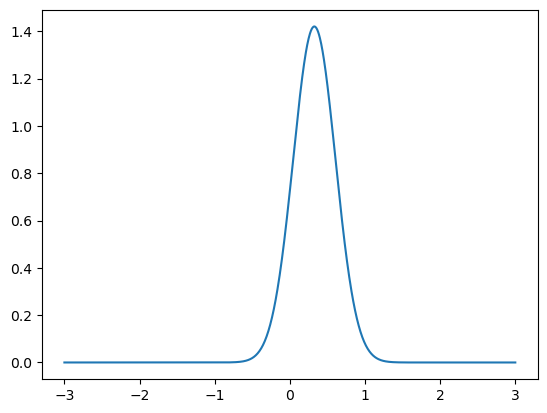

In [822]:
def logistic(x):
    return torch.log(x/(1-x))

x = torch.linspace(-3,3,1000)
mu_1, mu_2, mu_x = logistic(torch.rand(1,3)), logistic(torch.rand(1,3)), logistic(torch.rand(1,3))
var_1, var_2, var_x = torch.square(torch.rand(1,3)), torch.square(torch.rand(1,3)), torch.square(torch.rand(1,3))

v1x, v2x = var_1+var_x, var_2+var_x
s41, s42 = torch.square(var_1), torch.square(var_2)
emu1, emu2, emux = torch.exp(mu_1), torch.exp(mu_2), torch.exp(mu_x)
e1x, e2x  = emu1*emux, emu2*emux
e1p1, e2p1, e1xp1, e2xp1 = emu1+1, emu2+1, e1x+1, e2x+1
e1op1, e2op1, e1xop1, e2xop1 = emu1/e1p1, emu2/e2p1, e1x/e1xp1, e2x/e2xp1
e1op12, e2op12, e1xop12, e2xop12 = e1op1/e1p1, e2op1/e2p1, e1xop1/e1xp1, e2xop1/e2xp1
mu_out = torch.log(e2p1*e1xp1/(e1p1*e2xp1))
mu_out += (var_2*emu2/(e2p1**2) + (var_1 + var_x) * e1x/(e1xp1**2))/2
mu_out -= (var_1*emu1/(e1p1**2) + (var_2 + var_x) * e2x/(e2xp1**2))/2
print(mu_out)
var_out = var_1*torch.square(e1op1) + var_2*torch.square(e2op1) + v1x*torch.square(e1xop1) + v2x*torch.square(e2xop1)
var_out +=(s41*torch.square(e1op12)+s42*torch.square(e2op12))/2
var_out += (torch.square(v1x*e1xop12)+ torch.square(v2x*e2xop12))/2
var_out -= 2*(var_1*e1xop1*e1op1 + var_2*e2xop1*e2op1 + var_x*e1xop1*e2xop1)
var_out -= s41*e1xop12*e1op12 + s42*e2xop12*e2op12 + torch.square(var_x)*e1xop12*e2xop12
print(var_out)
log_probs = torch.distributions.normal.Normal(mu_out.sum(axis=-1), torch.sqrt(var_out.sum(axis=-1))).log_prob(x.view(-1,1))
plt.plot(x,torch.exp(log_probs))
plt.show()

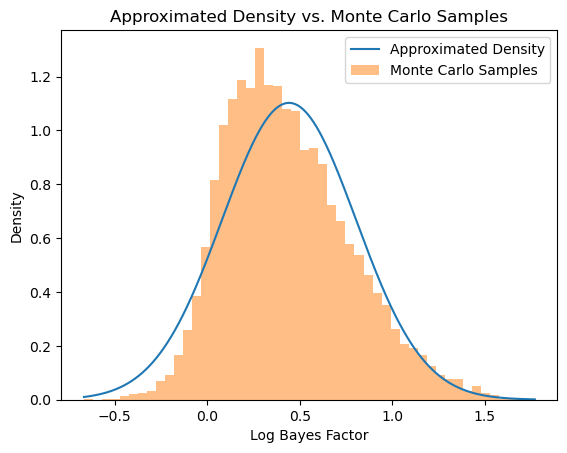

In [9]:
import torch
import matplotlib.pyplot as plt

# Random parameters (logit-normal means and variances)
num_input_neurons = 1
mu_1, mu_2, mu_x = torch.logit(torch.rand(1, num_input_neurons)), torch.logit(torch.rand(1, num_input_neurons)), torch.logit(torch.rand(1, num_input_neurons))
var_1, var_2, var_x = torch.square(torch.rand(1, num_input_neurons)), torch.square(torch.rand(1, num_input_neurons)), torch.square(torch.rand(1, num_input_neurons))

# Intermediate calculations
v1x, v2x = var_1 + var_x, var_2 + var_x
s41, s42 = torch.square(var_1), torch.square(var_2)
emu1, emu2, emux = torch.exp(mu_1), torch.exp(mu_2), torch.exp(mu_x)
e1x, e2x = emu1 * emux, emu2 * emux
e1p1, e2p1, e1xp1, e2xp1 = emu1 + 1, emu2 + 1, e1x + 1, e2x + 1
e1op1, e2op1, e1xop1, e2xop1 = emu1 / e1p1, emu2 / e2p1, e1x / e1xp1, e2x / e2xp1
e1op12, e2op12, e1xop12, e2xop12 = e1op1 / e1p1, e2op1 / e2p1, e1xop1 / e1xp1, e2xop1 / e2xp1

# Mean of log Bayes factor
mu_out = torch.log(e2p1 * e1xp1 / (e1p1 * e2xp1))
mu_out += (var_2 * emu2 / (e2p1 ** 2) + (var_1 + var_x) * e1x / (e1xp1 ** 2)) / 2
mu_out -= (var_1 * emu1 / (e1p1 ** 2) + (var_2 + var_x) * e2x / (e2xp1 ** 2)) / 2

# Variance of log Bayes factor
var_out = var_1 * torch.square(e1op1) + var_2 * torch.square(e2op1) + v1x * torch.square(e1xop1) + v2x * torch.square(e2xop1)
var_out += (s41 * torch.square(e1op12) + s42 * torch.square(e2op12)) / 2
var_out += (torch.square(v1x * e1xop12) + torch.square(v2x * e2xop12)) / 2
var_out -= 2 * (var_1 * e1xop1 * e1op1 + var_2 * e2xop1 * e2op1 + var_x * e1xop1 * e2xop1)
var_out -= s41 * e1xop12 * e1op12 + s42 * e2xop12 * e2op12 + torch.square(var_x) * e1xop12 * e2xop12

# Monte Carlo sampling
samples_w1 = torch.distributions.normal.Normal(mu_1, torch.sqrt(var_1)).sample((10000,))
samples_w2 = torch.distributions.normal.Normal(mu_2, torch.sqrt(var_2)).sample((10000,))
samples_x = torch.distributions.normal.Normal(mu_x, torch.sqrt(var_x)).sample((10000,))

# Calculate log Bayes factors for the samples
samples_bayes_factor = torch.log(
    (torch.exp(samples_w2) + 1) * (torch.exp(samples_w1 + samples_x) + 1) /
    ((torch.exp(samples_w1) + 1) * (torch.exp(samples_w2 + samples_x) + 1))
)

# Calculate histogram
hist_data = samples_bayes_factor.sum(axis=-1).numpy().flatten()
hist, bin_edges = np.histogram(hist_data, bins=50, density=True)

# Calculate new x range based on histogram data
x_min, x_max = bin_edges.min(), bin_edges.max()
x = torch.linspace(x_min, x_max, 1000)

# Plotting the approximated density
log_probs = torch.distributions.normal.Normal(mu_out.sum(), torch.sqrt(var_out.sum())).log_prob(x.view(-1, 1))
plt.plot(x, torch.exp(log_probs), label='Approximated Density')

# Plotting the histogram of Monte Carlo samples
plt.hist(hist_data, bins=50, density=True, alpha=0.5, label='Monte Carlo Samples')

# Show plot
plt.legend()
plt.xlabel('Log Bayes Factor')
plt.ylabel('Density')
plt.title('Approximated Density vs. Monte Carlo Samples')
plt.show()


Output mean: tensor([[-0.7947]], grad_fn=<AddBackward0>)
Output variance: tensor([[0.1187]])


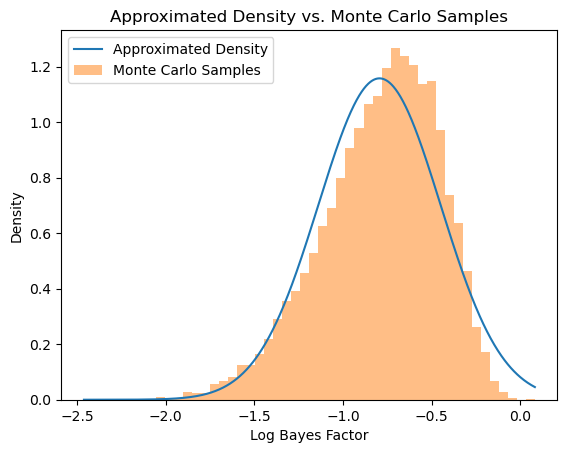

In [54]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class BayesFactorLayer(nn.Module):
    def __init__(self, num_input_neurons, num_output_neurons):
        super(BayesFactorLayer, self).__init__()
        self.num_input_neurons = num_input_neurons
        self.num_output_neurons = num_output_neurons
        
        # Initialize biases for the output neurons
        self.bias_mean = nn.Parameter(torch.zeros(1, num_output_neurons))
        # self.bias_var = nn.Parameter(torch.ones(1, num_output_neurons))
    
    def forward(self, mu_1, mu_2, mu_x, var_1, var_2, var_x):
        v1x, v2x = var_1 + var_x, var_2 + var_x
        s41, s42 = torch.square(var_1), torch.square(var_2)
        emu1, emu2, emux = torch.exp(mu_1), torch.exp(mu_2), torch.exp(mu_x)
        e1x, e2x = emu1 * emux, emu2 * emux
        e1p1, e2p1, e1xp1, e2xp1 = emu1 + 1, emu2 + 1, e1x + 1, e2x + 1
        e1op1, e2op1, e1xop1, e2xop1 = emu1 / e1p1, emu2 / e2p1, e1x / e1xp1, e2x / e2xp1
        e1op12, e2op12, e1xop12, e2xop12 = e1op1 / e1p1, e2op1 / e2p1, e1xop1 / e1xp1, e2xop1 / e2xp1
        
        # Mean of log Bayes factor
        mu_out = torch.log(e2p1 * e1xp1 / (e1p1 * e2xp1))
        mu_out += (var_2 * emu2 / (e2p1 ** 2) + (var_1 + var_x) * e1x / (e1xp1 ** 2)) / 2
        mu_out -= (var_1 * emu1 / (e1p1 ** 2) + (var_2 + var_x) * e2x / (e2xp1 ** 2)) / 2
        
        # Variance of log Bayes factor
        var_out = var_1 * torch.square(e1op1) + var_2 * torch.square(e2op1) + v1x * torch.square(e1xop1) + v2x * torch.square(e2xop1)
        var_out += (s41 * torch.square(e1op12) + s42 * torch.square(e2op12)) / 2
        var_out += (torch.square(v1x * e1xop12) + torch.square(v2x * e2xop12)) / 2
        var_out -= 2 * (var_1 * e1xop1 * e1op1 + var_2 * e2xop1 * e2op1 + var_x * e1xop1 * e2xop1)
        var_out -= s41 * e1xop12 * e1op12 + s42 * e2xop12 * e2op12 + torch.square(var_x) * e1xop12 * e2xop12
        
        # Sum the log Bayes factors and add bias
        mu_out_sum = mu_out.sum(dim=1, keepdim=True) + self.bias_mean
        var_out_sum = var_out.sum(dim=1, keepdim=True)
        # var_out_sum += self.bias_var
        
        return mu_out_sum, var_out_sum

# Example usage
num_input_neurons = 1
num_output_neurons = 1  # For simplicity, assume one output neuron

# Random parameters (logit-normal means and variances)
mu_1 = torch.logit(torch.rand(1, num_input_neurons))
mu_2 = torch.logit(torch.rand(1, num_input_neurons))
mu_x = torch.logit(torch.rand(1, num_input_neurons))
var_1 = torch.square(torch.rand(1, num_input_neurons))
var_2 = torch.square(torch.rand(1, num_input_neurons))
var_x = torch.square(torch.rand(1, num_input_neurons))

# Instantiate the layer and forward pass
bayes_layer = BayesFactorLayer(num_input_neurons, num_output_neurons)
mu_out, var_out = bayes_layer(mu_1, mu_2, mu_x, var_1, var_2, var_x)

print(f"Output mean: {mu_out}")
print(f"Output variance: {var_out}")

# Monte Carlo sampling for verification
samples_w1 = torch.distributions.normal.Normal(mu_1, torch.sqrt(var_1)).sample((10000,))
samples_w2 = torch.distributions.normal.Normal(mu_2, torch.sqrt(var_2)).sample((10000,))
samples_x = torch.distributions.normal.Normal(mu_x, torch.sqrt(var_x)).sample((10000,))

samples_bayes_factor = torch.log(
    (torch.exp(samples_w2) + 1) * (torch.exp(samples_w1 + samples_x) + 1) /
    ((torch.exp(samples_w1) + 1) * (torch.exp(samples_w2 + samples_x) + 1))
)

hist_data = samples_bayes_factor.sum(axis=-1).numpy().flatten()
hist, bin_edges = np.histogram(hist_data, bins=50, density=True)

x_min, x_max = bin_edges.min(), bin_edges.max()
x = torch.linspace(x_min, x_max, 1000)

log_probs = torch.distributions.normal.Normal(mu_out.sum(), torch.sqrt(var_out.sum())).log_prob(x.view(-1, 1))
plt.plot(x.detach().numpy(), torch.exp(log_probs).detach().numpy(), label='Approximated Density')
plt.hist(hist_data, bins=50, density=True, alpha=0.5, label='Monte Carlo Samples')

plt.legend()
plt.xlabel('Log Bayes Factor')
plt.ylabel('Density')
plt.title('Approximated Density vs. Monte Carlo Samples')
plt.show()


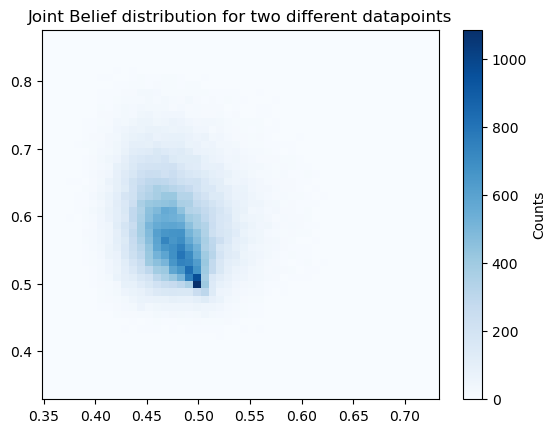

In [60]:
mu_1 = torch.logit(torch.rand(1, num_input_neurons))
mu_2 = torch.logit(torch.rand(1, num_input_neurons))
mu_x1 = torch.logit(torch.rand(1, num_input_neurons))
mu_x2 = torch.logit(torch.rand(1, num_input_neurons))
var_1 = torch.square(torch.rand(1, num_input_neurons))
var_2 = torch.square(torch.rand(1, num_input_neurons))
var_x1 = torch.square(torch.rand(1, num_input_neurons))
var_x2 = torch.square(torch.rand(1, num_input_neurons))


# Monte Carlo sampling for verification
samples_w1 = torch.distributions.normal.Normal(mu_1, torch.sqrt(var_1)).sample((100000,))
samples_w2 = torch.distributions.normal.Normal(mu_2, torch.sqrt(var_2)).sample((100000,))
samples_x1 = torch.distributions.normal.Normal(mu_x1, torch.sqrt(var_x1)).sample((100000,))
samples_x2 = torch.distributions.normal.Normal(mu_x2, torch.sqrt(var_x2)).sample((100000,))

samples_bayes_factor1 = torch.log(
    (torch.exp(samples_w2) + 1) * (torch.exp(samples_w1 + samples_x1) + 1) /
    ((torch.exp(samples_w1) + 1) * (torch.exp(samples_w2 + samples_x1) + 1))
)
samples_bayes_factor2 = torch.log(
    (torch.exp(samples_w2) + 1) * (torch.exp(samples_w1 + samples_x2) + 1) /
    ((torch.exp(samples_w1) + 1) * (torch.exp(samples_w2 + samples_x2) + 1))
)
sample_1_probs = torch.special.expit(samples_bayes_factor1.flatten())
sample_2_probs = torch.special.expit(samples_bayes_factor2.flatten())
plt.hist2d(sample_1_probs, sample_2_probs, bins=50, cmap='Blues')
plt.colorbar(label='Counts')
plt.title('Joint Belief distribution for two different datapoints')
plt.show()

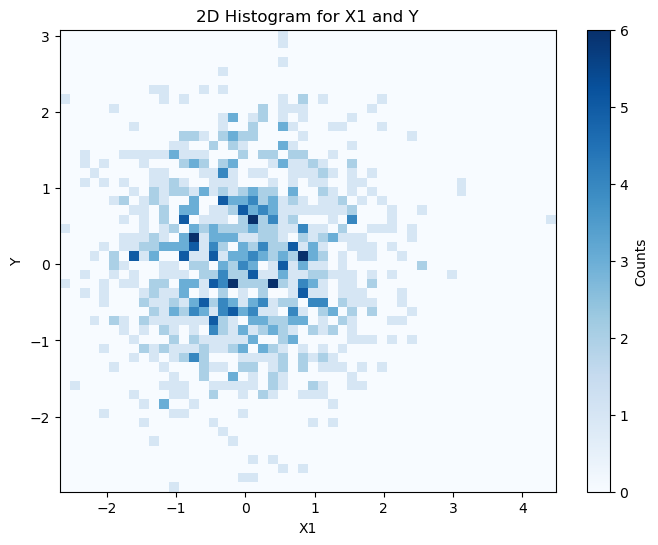

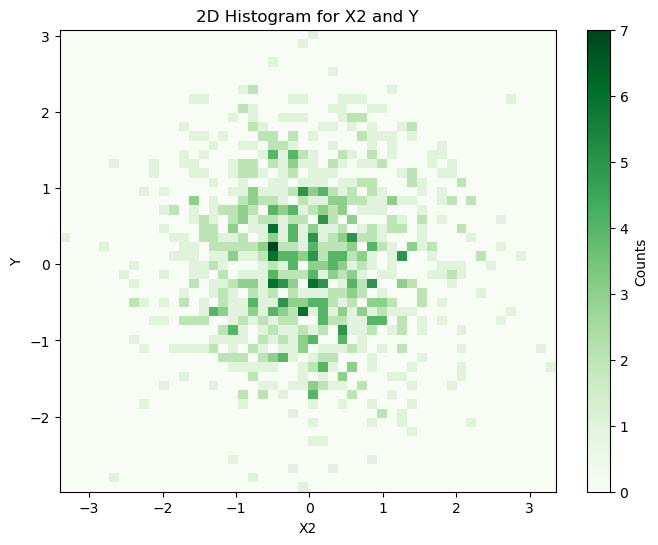

In [432]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
x1 = np.random.randn(1000)
x2 = np.random.randn(1000)
y = np.random.randn(1000)

# Create the 2D histogram
plt.figure(figsize=(8, 6))
plt.hist2d(x1, y, bins=50, cmap='Blues')
plt.colorbar(label='Counts')
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('2D Histogram for X1 and Y')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist2d(x2, y, bins=50, cmap='Greens')
plt.colorbar(label='Counts')
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('2D Histogram for X2 and Y')
plt.show()

In [38]:
mu_out.sum()

tensor(-1.2609)

In [520]:
from sympy import symbols, log, exp, series, expand, collect, factor
from IPython.display import display, Latex

# Define the variables
x1, x2, mu1, mu2 = symbols('x1 x2 mu1 mu2')
w1, w2, x = symbols('w1 w2 x')

# Define the function
f = log(-1 + (1 + exp(-x1)) * (1 + exp(-x2)))

# Perform Taylor expansion around (x1, x2) = (mu1, mu2)
# Let's expand to second order for simplicity, you can adjust 'n' for higher order
taylor_expansion = series(f.subs({x1: x1 + mu1, x2: x2 + mu2}), x1, 0, 2).removeO()
taylor_expansion = series(taylor_expansion, x2, 0, 2).removeO()

# Print the Taylor expansion
collected_x1 = collect(taylor_expansion, x1, evaluate=False)
for power in collected_x1:
    collected_x1[power] = collect(collected_x1[power], x2, evaluate=False)

final_expansion = sum(sum(term.subs({x1: x1 - mu1, x2: x2 - mu2}) 
                            for term in x2_terms.values()) 
                   for x2_terms in collected_x1.values())

# Simplify the final expression (optional)
final_expansion

(-mu1 + x1)*exp(2*mu2)/(exp(2*mu1) + 2*exp(mu1) + exp(2*mu2) + 2*exp(mu2) + 2*exp(mu1 + mu2) + 1) + (-mu1 + x1)*exp(mu2)/(exp(2*mu1) + 2*exp(mu1) + exp(2*mu2) + 2*exp(mu2) + 2*exp(mu1 + mu2) + 1) - (-mu1 + x1)*exp(mu2)/(exp(mu1) + exp(mu2) + 1) + log((exp(mu1) + exp(mu2) + 1)*exp(-mu1 - mu2)) - 2 - exp(2*mu2)/(exp(2*mu1) + 2*exp(mu1) + exp(2*mu2) + 2*exp(mu2) + 2*exp(mu1 + mu2) + 1) - exp(mu1 + mu2)/(exp(2*mu1) + 2*exp(mu1) + exp(2*mu2) + 2*exp(mu2) + 2*exp(mu1 + mu2) + 1) + exp(mu1)/(exp(mu1) + exp(mu2) + 1) + 2*exp(mu2)/(exp(mu1) + exp(mu2) + 1) - exp(mu2)/(exp(mu1) + exp(mu2) + 1)**2

In [571]:
w1, w2, x, mu = symbols('w1 w2 x \mu')
f = log((exp(w1+x)+1)/(exp(w2+x)+1))
series(f, x, mu, 3)

1/(exp(\mu + w1) + exp(\mu + w2) + exp(2*\mu + w1 + w2) + 1) + exp(2*\mu + w1 + w2)/(exp(\mu + w1) + exp(\mu + w2) + exp(2*\mu + w1 + w2) + 1) + exp(\mu + w2)/(exp(\mu + w1) + exp(\mu + w2) + exp(2*\mu + w1 + w2) + 1) + exp(\mu + w1)/(exp(\mu + w1) + exp(\mu + w2) + exp(2*\mu + w1 + w2) + 1) - 1 + log((exp(\mu + w1) + 1)/(exp(\mu + w2) + 1)) - (-1 + exp(\mu + w1)/(exp(\mu + w1) + exp(\mu + w2) + exp(2*\mu + w1 + w2) + 1) + exp(\mu + w2)/(exp(\mu + w1) + exp(\mu + w2) + exp(2*\mu + w1 + w2) + 1) + exp(2*\mu + w1 + w2)/(exp(\mu + w1) + exp(\mu + w2) + exp(2*\mu + w1 + w2) + 1) + 1/(exp(\mu + w1) + exp(\mu + w2) + exp(2*\mu + w1 + w2) + 1))**2/2 + (-\mu + x)*(-(-1 + exp(\mu + w1)/(exp(\mu + w1) + exp(\mu + w2) + exp(2*\mu + w1 + w2) + 1) + exp(\mu + w2)/(exp(\mu + w1) + exp(\mu + w2) + exp(2*\mu + w1 + w2) + 1) + exp(2*\mu + w1 + w2)/(exp(\mu + w1) + exp(\mu + w2) + exp(2*\mu + w1 + w2) + 1) + 1/(exp(\mu + w1) + exp(\mu + w2) + exp(2*\mu + w1 + w2) + 1))*(-2*exp(\mu + w2)/(2*exp(\mu + w1)

In [600]:
from sympy import symbols, exp, log, series, simplify, factor, expand

# Define symbols
w1, w2, x, mu = symbols('w1 w2 x mu')

# Define the function
f = log((exp(w1 + x) + 1) / (exp(w2 + x) + 1))

# Compute the Taylor series of f around x=mu, up to order 3
taylor_expansion = series(f, x, mu, 3)

# Initialize the simplified series
simplified_series = 0

# Loop through each term in the series
for term in taylor_expansion.args:
    # Check if the term is the order of truncation
    if term.is_Order:
        simplified_series += term
    else:
        # Separate the coefficient and powers
        coeff, powers = term.as_coeff_mul(x-mu)
        # If powers is empty, the term is a constant
        if not powers:
            simplified_series += simplify(coeff)
        else:
            # Simplify only the coefficient
            simplified_series += simplify(coeff) * powers[0]

# Print the simplified series
simplified_series


1/(exp(mu + w1) + exp(mu + w2) + exp(2*mu + w1 + w2) + 1) + exp(2*mu + w1 + w2)/(exp(mu + w1) + exp(mu + w2) + exp(2*mu + w1 + w2) + 1) + exp(mu + w2)/(exp(mu + w1) + exp(mu + w2) + exp(2*mu + w1 + w2) + 1) + exp(mu + w1)/(exp(mu + w1) + exp(mu + w2) + exp(2*mu + w1 + w2) + 1) - 1 + log((exp(mu + w1) + 1)/(exp(mu + w2) + 1)) + (-mu + x)*(exp(w1) - exp(w2))*exp(mu)/(exp(mu + w1) + exp(mu + w2) + exp(2*mu + w1 + w2) + 1) + (-mu + x)**2*(exp(w1) - exp(w2) + exp(2*mu + w1 + 2*w2) - exp(2*mu + 2*w1 + w2))*exp(mu)/(2*(2*exp(mu + w1) + 2*exp(mu + w2) + exp(2*mu + 2*w1) + exp(2*mu + 2*w2) + 4*exp(2*mu + w1 + w2) + 2*exp(3*mu + w1 + 2*w2) + 2*exp(3*mu + 2*w1 + w2) + exp(4*mu + 2*w1 + 2*w2) + 1)) + O((-mu + x)**3, (x, mu))

In [588]:
sigma = symbols('\sigma')
expectation = simplified_series.subs((x-mu)**2, sigma**2).subs(x-mu, 0)
expectation

\sigma**2*(exp(w1) - exp(w2) + exp(2*mu + w1 + 2*w2) - exp(2*mu + 2*w1 + w2))*exp(mu)/(2*(2*exp(mu + w1) + 2*exp(mu + w2) + exp(2*mu + 2*w1) + exp(2*mu + 2*w2) + 4*exp(2*mu + w1 + w2) + 2*exp(3*mu + w1 + 2*w2) + 2*exp(3*mu + 2*w1 + w2) + exp(4*mu + 2*w1 + 2*w2) + 1)) + log((exp(mu + w1) + 1)/(exp(mu + w2) + 1)) - 1 + exp(mu + w1)/(exp(mu + w1) + exp(mu + w2) + exp(2*mu + w1 + w2) + 1) + exp(mu + w2)/(exp(mu + w1) + exp(mu + w2) + exp(2*mu + w1 + w2) + 1) + exp(2*mu + w1 + w2)/(exp(mu + w1) + exp(mu + w2) + exp(2*mu + w1 + w2) + 1) + 1/(exp(mu + w1) + exp(mu + w2) + exp(2*mu + w1 + w2) + 1)

In [605]:
mu_out = factor(expectation.args[-2])
mu_out

-\sigma**2*(exp(2*mu)*exp(w1)*exp(w2) - 1)*(exp(w1) - exp(w2))*exp(mu)/(2*(exp(mu)*exp(w1) + 1)**2*(exp(mu)*exp(w2) + 1)**2)

In [611]:
f = log((exp(w1 + x) + 1) / (exp(w2 + x) + 1))

# Compute the Taylor series of f around x=mu, up to order 3
taylor_expansion = series(f, x, mu, 3)

# Initialize the simplified series
simplified_series = 0

# Loop through each term in the series
for term in taylor_expansion.args:
    # Check if the term is the order of truncation
    if term.is_Order:
        simplified_series += term
    else:
        # Separate the coefficient and powers
        coeff, powers = term.as_coeff_mul(x-mu)
        # If powers is empty, the term is a constant
        if not powers:
            simplified_series += simplify(coeff)
        else:
            # Simplify only the coefficient
            simplified_series += simplify(coeff) * powers[0]

# Print the simplified series
simplified_series

1/(exp(mu + w1) + exp(mu + w2) + exp(2*mu + w1 + w2) + 1) + exp(2*mu + w1 + w2)/(exp(mu + w1) + exp(mu + w2) + exp(2*mu + w1 + w2) + 1) + exp(mu + w2)/(exp(mu + w1) + exp(mu + w2) + exp(2*mu + w1 + w2) + 1) + exp(mu + w1)/(exp(mu + w1) + exp(mu + w2) + exp(2*mu + w1 + w2) + 1) - 1 + log((exp(mu + w1) + 1)/(exp(mu + w2) + 1)) + (-mu + x)*(exp(w1) - exp(w2))*exp(mu)/(exp(mu + w1) + exp(mu + w2) + exp(2*mu + w1 + w2) + 1) + (-mu + x)**2*(exp(w1) - exp(w2) + exp(2*mu + w1 + 2*w2) - exp(2*mu + 2*w1 + w2))*exp(mu)/(2*(2*exp(mu + w1) + 2*exp(mu + w2) + exp(2*mu + 2*w1) + exp(2*mu + 2*w2) + 4*exp(2*mu + w1 + w2) + 2*exp(3*mu + w1 + 2*w2) + 2*exp(3*mu + 2*w1 + w2) + exp(4*mu + 2*w1 + 2*w2) + 1)) + O((-mu + x)**3, (x, mu))

In [623]:
a = (exp(mu+w1)-exp(mu+w2))/((1+exp(mu+w1))*(1+exp(mu+w2)))
a

(exp(mu + w1) - exp(mu + w2))/((exp(mu + w1) + 1)*(exp(mu + w2) + 1))

In [624]:
b = 1/2*(exp(mu+w1)/(exp(mu+w1)+1)**2- exp(mu+w2)/(exp(mu+w2)+1)**2)
b

-0.5*exp(mu + w2)/(exp(mu + w2) + 1)**2 + 0.5*exp(mu + w1)/(exp(mu + w1) + 1)**2

In [630]:
a**2*sigma**2 + b**2*sigma**4

0.25*\sigma**4*(-exp(mu + w2)/(exp(mu + w2) + 1)**2 + exp(mu + w1)/(exp(mu + w1) + 1)**2)**2 + \sigma**2*(exp(mu + w1) - exp(mu + w2))**2/((exp(mu + w1) + 1)**2*(exp(mu + w2) + 1)**2)

In [564]:
import torch

# Assuming alpha, beta, and lambda_ are defined as tensors with compatible shapes
alpha = torch.tensor([1,2,3])
beta = torch.tensor([5,6,7])
# lambda_ = torch.tensor([[[.2, .7],[.3, .9],[.3, .9]]])
lambda_ = torch.tensor([[.2,.3,.3], [.7, .9, .9], [.7, .9, .9], [0, 0, 0]])

# Adjust shapes if necessary to ensure they are broadcastable

# Calculate the terms in the log of the Beta function ratios
beta_lambda_2 = torch.lgamma(alpha + 2 - 2 * lambda_) + torch.lgamma(beta + 2 * lambda_) - torch.lgamma(alpha + beta + 2)
beta_lambda_1 = torch.lgamma(alpha + 1 - lambda_) + torch.lgamma(beta + lambda_) - torch.lgamma(alpha + beta + 1)
plain_beta =  torch.lgamma(alpha) + torch.lgamma(beta) - torch.lgamma(alpha + beta)

# Sum over j if necessary (assuming summing over the last dimension)
R = torch.exp(torch.sum(beta_lambda_2 - beta_lambda_1, dim=-1))
S = torch.exp(torch.sum(beta_lambda_1 - plain_beta, dim=-1))

n = (1-R)/(R-S)
alpha_out = n*S
beta_out = n *(1-S)

print('alpha:')
print(alpha_out)
print('beta:')
print(beta_out)

alpha:
tensor([ 1.3191, 10.0077, 10.0077,  0.5452])
beta:
tensor([51.0326, 44.0184, 44.0184, 43.0733])


In [557]:
alpha.shape

torch.Size([3])

In [558]:
lambda_.shape

torch.Size([3, 3])

In [559]:
alpha_out.shape

torch.Size([3])

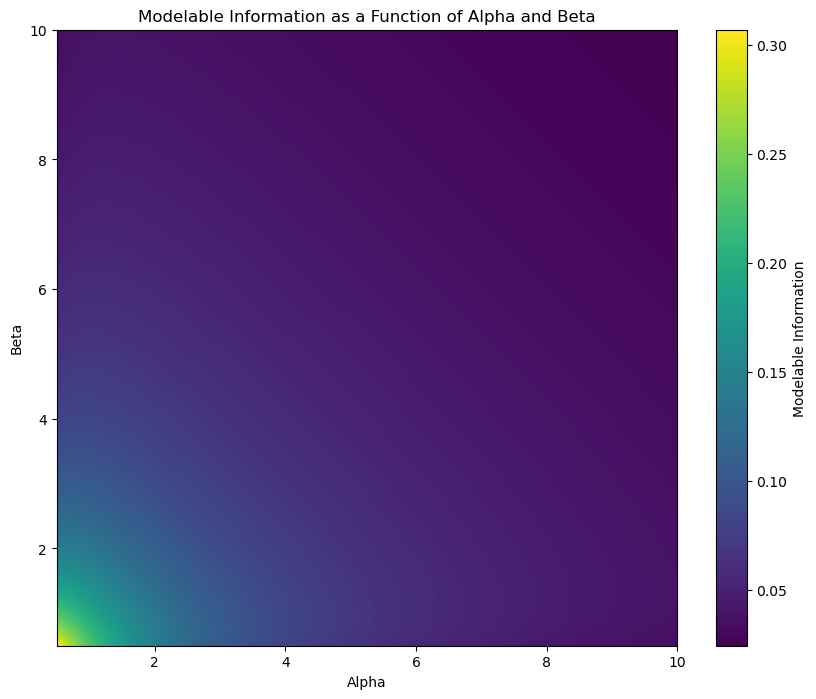

In [625]:
import torch
import matplotlib.pyplot as plt

# Create alpha and beta values
low = .5
high = 10
alpha = torch.linspace(low, high, steps=1000).view(1, -1)
beta = torch.linspace(low, high, steps=1000).view(-1, 1)

# Calculate Shannon entropy
expected_aleatoric = -alpha / (alpha + beta) * torch.digamma(alpha + 1) - beta / (alpha + beta) * torch.digamma(beta + 1) + torch.digamma(alpha + beta + 1)
expected_total = -alpha / (alpha + beta) * torch.log(alpha / (alpha + beta)) -beta / (alpha + beta) * torch.log(beta / (alpha + beta))
expected_epistemic = expected_total-expected_aleatoric
# Plot the result
plt.figure(figsize=(10, 8))
plt.imshow((expected_epistemic).numpy(), aspect='auto', origin='lower', extent=[low, high, low, high])
plt.colorbar(label='Modelable Information')
plt.xlabel('Alpha')
plt.ylabel('Beta')
plt.title('Modelable Information as a Function of Alpha and Beta')
plt.show()


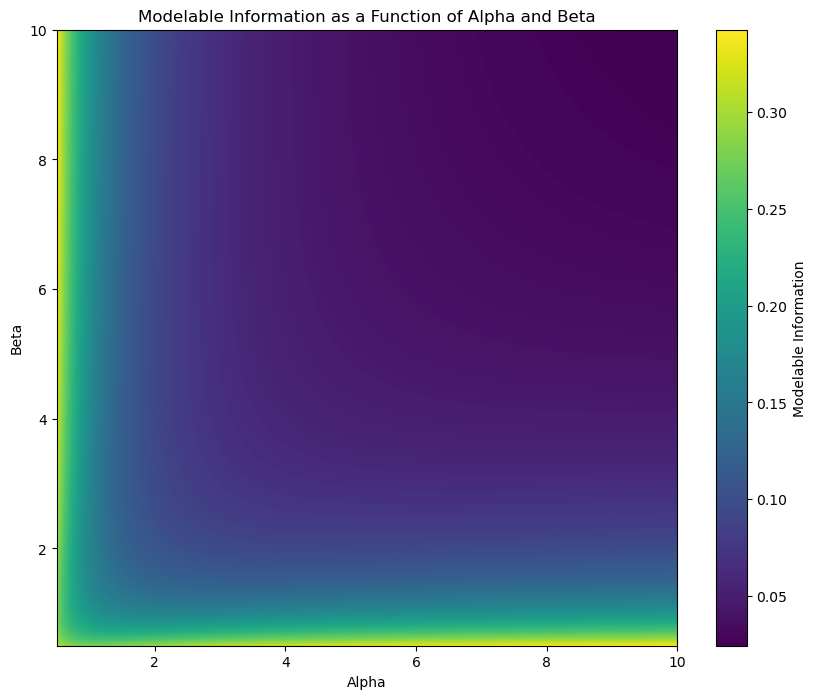

In [634]:

# Create alpha and beta values
low = .5
high = 10
alpha = torch.linspace(low, high, steps=1000).view(1, -1)
beta = torch.linspace(low, high, steps=1000).view(-1, 1)
p = .5

# Calculate Shannon entropy
total_information = -p*torch.log(alpha/(alpha+beta)) - (1-p)*torch.log(beta/(alpha+beta))
aleatoric_information = torch.digamma(alpha + beta + 1) - p*torch.digamma(alpha + 1) - (1-p)*torch.digamma(beta + 1)
modelable_information = total_information - aleatoric_information
# Plot the result
plt.figure(figsize=(10, 8))
plt.imshow(modelable_information.numpy(), aspect='auto', origin='lower', extent=[low, high, low, high])
plt.colorbar(label='Modelable Information')
plt.xlabel('Alpha')
plt.ylabel('Beta')
plt.title('Modelable Information as a Function of Alpha and Beta')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import torch

# Define the function to plot
def plot_modelable_information(p=0.5):
    # Create alpha and beta values
    low = 0.5
    high = 40
    alpha = torch.linspace(low, high, steps=1000).view(1, -1)
    beta = torch.linspace(low, high, steps=1000).view(-1, 1)
    
    # Calculate Shannon entropy
    total_information = -p*torch.log(alpha/(alpha+beta)) - (1-p)*torch.log(beta/(alpha+beta))
    aleatoric_information = torch.digamma(alpha + beta + 1) - p*torch.digamma(alpha + 1) - (1-p)*torch.digamma(beta + 1)
    modelable_information = total_information - aleatoric_information
    
    # Convert to numpy array for plotting
    modelable_information_np = modelable_information.numpy()
    
    # Create a meshgrid for alpha and beta
    alpha_vals = alpha.numpy().flatten()
    beta_vals = beta.numpy().flatten()
    A, B = np.meshgrid(alpha_vals, beta_vals)
    
    # Plot the result
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(A, B, modelable_information_np, levels=100, cmap='viridis')
    plt.colorbar(contour, label='Modelable Information')
    
    # Labels and title
    plt.xlabel('Alpha')
    plt.ylabel('Beta')
    plt.title('Modelable Information as a Function of Alpha and Beta')
    plt.show()

# Create interactive widget
interact(plot_modelable_information, p=(0.0, 1.0, 0.01));


interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import torch

# Define the function to plot
def plot_modelable_information(p=0.5):
    # Create alpha and beta values
    low = .5
    high = 40
    alpha = torch.linspace(low, high, steps=1000).view(1, -1)
    beta = torch.linspace(low, high, steps=1000).view(-1, 1)
    
    # Calculate Shannon entropy
    p_1, p_2 = 1/2, 1/2
    # modelable_information = torch.log2((alpha+p_1)*(beta+p_2)*(p_1+p_2)/((alpha+beta+p_1+p_2)*p_1*p_2))
    modelable_information = torch.log2((alpha+p)*(beta+(1-p))*(alpha+beta)/((alpha+beta+1)*alpha*beta))
    # total_information = -p*torch.log(alpha/(alpha+beta)) - (1-p)*torch.log(beta/(alpha+beta))
    # aleatoric_information = torch.digamma(alpha + beta + 1) - p*torch.digamma(alpha + 1) - (1-p)*torch.digamma(beta + 1)
    # modelable_information = total_information - aleatoric_information
    
    # Convert to numpy array for plotting
    # modelable_information_np = modelable_information.numpy()
    
    # Create a meshgrid for alpha and beta
    alpha_vals = alpha.numpy().flatten()
    beta_vals = beta.numpy().flatten()
    A, B = np.meshgrid(alpha_vals, beta_vals)
    
    # Plot the result
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(A, B, modelable_information, levels=100, cmap='viridis')
    plt.colorbar(contour, label='Model Information')
    
    # Labels and title
    plt.xlabel('Alpha')
    plt.ylabel('Beta')
    plt.title('Model Information as a Function of Alpha and Beta')
    plt.show()

# Create interactive widget
interact(plot_modelable_information, p=(0.0, 1.0, 0.01));


interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, step=0.01), Output()), _dom_classes=('w…

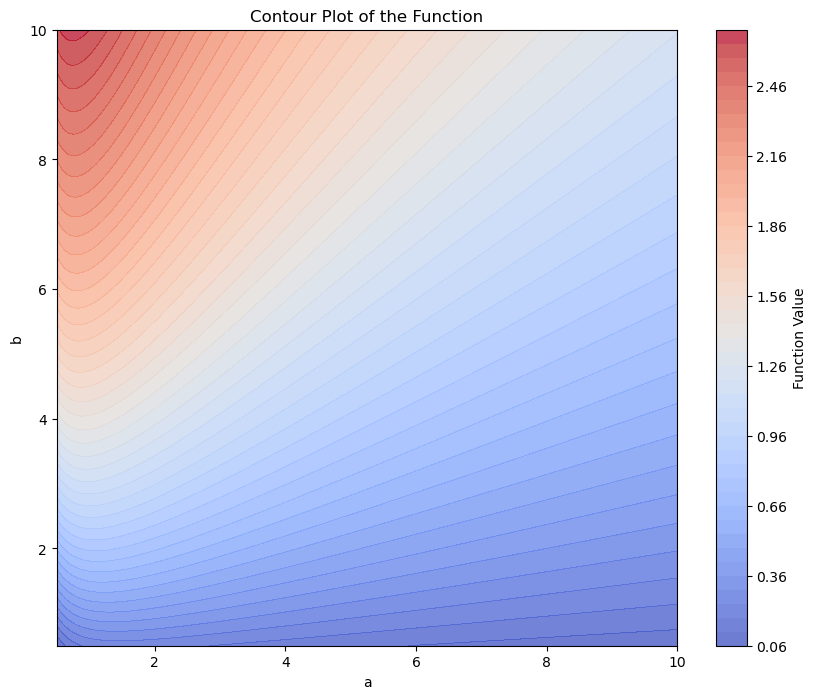

In [645]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import digamma

# Define the function
def func(a, b):
    term1 = digamma(a + b + 1) - digamma(a + 1)
    term2 = digamma(a + b + 2) - digamma(a + 2)
    term3 = np.log(a / (a + b)) + np.log((a + 1) / (a + b + 1))
    term4 = 2 * (digamma(a + b + 2) - digamma(a + 2))
    return term1 + term2 + term3 + term4

# Create a grid of a and b values
a_values = np.linspace(0.5, 10, 400)
b_values = np.linspace(0.5, 10, 400)
A, B = np.meshgrid(a_values, b_values)

# Evaluate the function over the grid
Z = func(A, B)

# Plot the results
plt.figure(figsize=(10, 8))
contour = plt.contourf(A, B, Z, levels=50, cmap='coolwarm', alpha=0.75)
plt.colorbar(contour, label='Function Value')
plt.contour(A, B, Z, levels=[0], colors='black', linewidths=0.5)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Contour Plot of the Function')
plt.show()


In [11]:
alpha = (torch.randn(3,4,4,2)*10)**2
x = (torch.randn(3,4,4,2)*10)**2

In [27]:
def dirichlet_multinomial_loss(alpha, x):
    prior_n = alpha.sum(axis=-1)
    obs_n = x.sum(axis=-1)
    return -torch.lgamma(prior_n) - torch.lgamma(obs_n + 1) + torch.lgamma(prior_n + obs_n) - (torch.lgamma(x+alpha)-torch.lgamma(alpha)-torch.lgamma(x+1)).sum(axis=-1)
    
def aleatoric_information_loss(alpha, x):
    prior_n = alpha.sum(axis=-1)
    obs_n = x.sum(axis=-1)
    return obs_n*torch.digamma(prior_n+obs_n)-(x*torch.digamma(alpha+x)).sum(axis=-1) -torch.lgamma(obs_n+1) + torch.lgamma(x+1).sum(axis=-1)

def epistemic_information_loss(alpha, x):
    prior_n = alpha.sum(axis=-1)
    obs_n = x.sum(axis=-1)
    return -torch.lgamma(prior_n) + torch.lgamma(prior_n + obs_n) - (torch.lgamma(x+alpha)-torch.lgamma(alpha)).sum(axis=-1) -obs_n*torch.digamma(prior_n+obs_n) + (x*torch.digamma(alpha+x)).sum(axis=-1)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import torch

# Define the function to plot
def plot_modelable_information(x=1, y=0):
    # Create alpha and beta values
    steps=1000
    low = .5
    high = 40
    alpha = torch.linspace(low, high, steps=steps)
    beta = torch.linspace(low, high, steps=steps)
    alpha_vals = alpha.numpy().flatten()
    beta_vals = beta.numpy().flatten()
    A, B = np.meshgrid(alpha_vals, beta_vals)
    
    alpha = torch.cartesian_prod(alpha,beta)

    obs = torch.tensor([x,y])
    aleatoric_information = aleatoric_information_loss(alpha, obs)
    
    # Create a meshgrid for alpha and beta

    
    # Plot the result
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(A, B, aleatoric_information.view(steps,steps).transpose(0,1), levels=100, cmap='viridis')
    plt.colorbar(contour, label='Model Information')
    
    # Labels and title
    plt.xlabel('Alpha')
    plt.ylabel('Beta')
    plt.title('Aleatoric Information as a Function of Alpha and Beta')
    plt.show()

# Create interactive widget
interact(plot_modelable_information, x=(0, 10, 1), y=(0, 10, 1));

interactive(children=(IntSlider(value=1, description='x', max=10), IntSlider(value=0, description='y', max=10)…

In [33]:
low = .5
high = 40
alpha = torch.linspace(low, high, steps=1000)
beta = torch.linspace(low, high, steps=1000)
alpha = torch.cartesian_prod(alpha,beta).shape

obs = torch.tensor([x,y])
aleatoric_information = aleatoric_information_loss(alpha, x)

torch.Size([1000000, 2])

In [76]:
def difference_version(loss_function, prior):
    def modified_function(alpha, x):
        return loss_function(prior, alpha + x) - loss_function(prior, alpha)
    return modified_function

difference_version(aleatoric_information_loss, torch.tensor([1/2,1/2]))

<function __main__.difference_version.<locals>.modified_function(alpha, x)>

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import torch

# Define the function to plot
def plot_losses(loss_functions, titles, x=1, y=0):
    # Create alpha and beta values
    steps=100
    low = .5
    high = 40
    alpha = torch.linspace(low, high, steps=steps)
    beta = torch.linspace(low, high, steps=steps)
    alpha_vals = alpha.numpy().flatten()
    beta_vals = beta.numpy().flatten()
    A, B = np.meshgrid(alpha_vals, beta_vals)
    
    alpha = torch.cartesian_prod(alpha,beta)

    obs = torch.tensor([x,y])
    
    # Determine the grid size
    num_plots = len(loss_functions)
    num_cols = min(4, num_plots)
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    # Create the figure and subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 8 * num_rows))
    axs = axs.flatten()

    for i, (loss_fn, title) in enumerate(zip(loss_functions, titles)):
        loss = loss_fn(alpha, obs)
        contour = axs[i].contourf(A, B, loss.view(steps, steps).transpose(0, 1), levels=100, cmap='viridis')
        fig.colorbar(contour, ax=axs[i], label=title)
        axs[i].set_xlabel('Alpha')
        axs[i].set_ylabel('Beta')
        axs[i].set_title(title)
    
    # Remove unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    # Display the plots
    plt.tight_layout()
    plt.show()

In [68]:
def difference_version(loss_function, prior):
    def modified_function(alpha, x):
        return loss_function(prior * torch.ones_like(alpha), alpha + x) - loss_function(prior * torch.ones_like(alpha), alpha)
    return modified_function

# Define the loss functions
def dirichlet_multinomial_loss(alpha, x):
    prior_n = alpha.sum(axis=-1)
    obs_n = x.sum(axis=-1)
    return -torch.lgamma(prior_n) - torch.lgamma(obs_n + 1) + torch.lgamma(prior_n + obs_n) - (torch.lgamma(x+alpha)-torch.lgamma(alpha)-torch.lgamma(x+1)).sum(axis=-1)
    
def aleatoric_information_loss(alpha, x):
    prior_n = alpha.sum(axis=-1)
    obs_n = x.sum(axis=-1)
    return obs_n*torch.digamma(prior_n+obs_n)-(x*torch.digamma(alpha+x)).sum(axis=-1) -torch.lgamma(obs_n+1) + torch.lgamma(x+1).sum(axis=-1)

def epistemic_information_loss(alpha, x):
    prior_n = alpha.sum(axis=-1)
    obs_n = x.sum(axis=-1)
    return -torch.lgamma(prior_n) + torch.lgamma(prior_n + obs_n) - (torch.lgamma(x+alpha)-torch.lgamma(alpha)).sum(axis=-1) -obs_n*torch.digamma(prior_n+obs_n) + (x*torch.digamma(alpha+x)).sum(axis=-1)

def unmodeled_information_loss(alpha, x):
    return dirichlet_multinomial_loss(alpha, alpha + x)

def modeled_information_loss(alpha, x):
    return dirichlet_multinomial_loss(alpha, x) - unmodeled_information_loss(alpha, x)


# Define the list of loss functions and their titles
loss_functions = [dirichlet_multinomial_loss, 
                  aleatoric_information_loss, 
                  epistemic_information_loss, 
                  unmodeled_information_loss, 
                  modeled_information_loss,]
titles = ['Dirichlet Multinomial Loss', 
          'Aleatoric Information', 
          'Epistemic Information', 
          'Unmodeled Information', 
          'Modeled Information']

# Create interactive widget
interact(lambda x, y: plot_losses(loss_functions, titles, x, y), x=(0, 10, 1), y=(0, 10, 1));


interactive(children=(IntSlider(value=5, description='x', max=10), IntSlider(value=5, description='y', max=10)…

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import torch

# Define the function to plot
def plot_losses(loss_functions, titles, x=1, y=0):
    # Create alpha and beta values
    steps = 100
    low = 0.5
    high = 40
    alpha = torch.linspace(low, high, steps=steps)
    beta = torch.linspace(low, high, steps=steps)
    alpha_vals = alpha.numpy().flatten()
    beta_vals = beta.numpy().flatten()
    A, B = np.meshgrid(alpha_vals, beta_vals)
    
    alpha = torch.cartesian_prod(alpha, beta)

    obs = torch.tensor([x, y])
    
    # Determine the grid size
    num_plots = len(loss_functions) * 3  # Original and difference version for each
    num_cols = min(4, num_plots)
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    # Create the figure and subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 8 * num_rows))
    axs = axs.flatten()

    for i, (loss_fn, title) in enumerate(zip(loss_functions, titles)):
        # Plot the original loss function
        loss = loss_fn(alpha, obs)
        contour = axs[3*i].contourf(A, B, loss.view(steps, steps).transpose(0, 1), levels=100, cmap='viridis')
        fig.colorbar(contour, ax=axs[3*i], label=title)
        axs[3*i].set_xlabel('Alpha')
        axs[3*i].set_ylabel('Beta')
        axs[3*i].set_title(title)
        
        # Plot the difference version of the loss function
        diff_loss_fn = difference_version(loss_fn, 1/2)
        diff_loss = diff_loss_fn(alpha, obs)
        diff_title = f'Difference {title}'
        contour = axs[3*i + 1].contourf(A, B, diff_loss.view(steps, steps).transpose(0, 1), levels=100, cmap='viridis')
        fig.colorbar(contour, ax=axs[3*i + 1], label=diff_title)
        axs[3*i + 1].set_xlabel('Alpha')
        axs[3*i + 1].set_ylabel('Beta')
        axs[3*i + 1].set_title(diff_title)

        target_loss_fn = target_version(loss_fn)
        target_loss = target_loss_fn(alpha, obs)
        target_title = f'Target {title}'
        contour = axs[3*i + 2].contourf(A, B, target_loss.view(steps, steps).transpose(0, 1), levels=100, cmap='viridis')
        fig.colorbar(contour, ax=axs[3*i + 2], label=target_title)
        axs[3*i + 2].set_xlabel('Alpha')
        axs[3*i + 2].set_ylabel('Beta')
        axs[3*i + 2].set_title(target_title)
    
    # Remove unused subplots
    for j in range(3 * len(loss_functions), len(axs)):
        fig.delaxes(axs[j])
    
    # Display the plots
    plt.tight_layout()
    plt.show()

def difference_version(loss_function, prior):
    def modified_function(alpha, x):
        return loss_function(prior * torch.ones_like(alpha), alpha + x - prior) - loss_function(prior * torch.ones_like(alpha), alpha - prior)
    return modified_function

def target_version(loss_function):
    def modified_function(alpha, x):
        return loss_function(alpha, alpha + x)
    return modified_function

# Define the loss functions
def dirichlet_multinomial_loss(alpha, x):
    prior_n = alpha.sum(axis=-1)
    obs_n = x.sum(axis=-1)
    return -torch.lgamma(prior_n) - torch.lgamma(obs_n + 1) + torch.lgamma(prior_n + obs_n) - (torch.lgamma(x+alpha)-torch.lgamma(alpha)-torch.lgamma(x+1)).sum(axis=-1)
    
def aleatoric_information_loss(alpha, x):
    prior_n = alpha.sum(axis=-1)
    obs_n = x.sum(axis=-1)
    return obs_n*torch.digamma(prior_n+obs_n)-(x*torch.digamma(alpha+x)).sum(axis=-1) -torch.lgamma(obs_n+1) + torch.lgamma(x+1).sum(axis=-1)

def epistemic_information_loss(alpha, x):
    prior_n = alpha.sum(axis=-1)
    obs_n = x.sum(axis=-1)
    return -torch.lgamma(prior_n) + torch.lgamma(prior_n + obs_n) - (torch.lgamma(x+alpha)-torch.lgamma(alpha)).sum(axis=-1) -obs_n*torch.digamma(prior_n+obs_n) + (x*torch.digamma(alpha+x)).sum(axis=-1)

def unmodeled_information_loss(alpha, x):
    return dirichlet_multinomial_loss(alpha, alpha + x)

def modeled_information_loss(alpha, x):
    return dirichlet_multinomial_loss(alpha, x) - unmodeled_information_loss(alpha, x)

def expected_prob_nll(alpha, x):
    return -((alpha-1)*torch.digamma(x+1)).sum(axis=-1) + (alpha-1).sum(axis=-1)*torch.digamma((x+1).sum(axis=-1)) + (torch.lgamma(alpha).sum(axis=-1)-torch.lgamma(alpha.sum(axis=-1)))

def xent_bayes_risk(alpha, x):
    prior_n = alpha.sum(axis=-1)
    obs_n = x.sum(axis=-1)
    post_n = prior_n + obs_n
    return (post_n-1)*torch.digamma(post_n) - (prior_n-1)*torch.digamma(prior_n) - ((alpha + x - 1)*torch.digamma(x+alpha)).sum(-1) + ((alpha-1)*torch.digamma(alpha)).sum(-1)

# Define the list of loss functions and their titles
loss_functions = [dirichlet_multinomial_loss, 
                  aleatoric_information_loss, 
                  epistemic_information_loss, 
                  unmodeled_information_loss, 
                  modeled_information_loss,
                  expected_prob_nll,
                  xent_bayes_risk]

titles = ['Dirichlet Multinomial Loss', 
          'Aleatoric Information', 
          'Epistemic Information', 
          'Unmodeled Information', 
          'Modeled Information',
          'Expected Prob NLL',
          'Cross-Entropy Bayes Risk']

# Create interactive widget
interact(lambda x, y: plot_losses(loss_functions, titles, x, y), x=(0, 10, 1), y=(0, 10, 1));


interactive(children=(IntSlider(value=5, description='x', max=10), IntSlider(value=5, description='y', max=10)…

In [93]:
out_functions = []
for loss_function in loss_functions:
    out_functions.append(loss_function)
    out_functions.append(difference_version(loss_function,prior=1/2))
    out_functions.append(target_version(loss_function))
out_functions

[<function __main__.dirichlet_multinomial_loss(alpha, x)>,
 <function __main__.difference_version.<locals>.modified_function(alpha, x)>,
 <function __main__.target_version.<locals>.modified_function(alpha, x)>,
 <function __main__.aleatoric_information_loss(alpha, x)>,
 <function __main__.difference_version.<locals>.modified_function(alpha, x)>,
 <function __main__.target_version.<locals>.modified_function(alpha, x)>,
 <function __main__.epistemic_information_loss(alpha, x)>,
 <function __main__.difference_version.<locals>.modified_function(alpha, x)>,
 <function __main__.target_version.<locals>.modified_function(alpha, x)>,
 <function __main__.unmodeled_information_loss(alpha, x)>,
 <function __main__.difference_version.<locals>.modified_function(alpha, x)>,
 <function __main__.target_version.<locals>.modified_function(alpha, x)>,
 <function __main__.modeled_information_loss(alpha, x)>,
 <function __main__.difference_version.<locals>.modified_function(alpha, x)>,
 <function __main__.t

In [94]:
def m(model_preds,y):
    if 'alpha' in model_preds:
        alpha = model_preds['alpha']
    out_functions[0](alpha, y)

<function __main__.dirichlet_multinomial_loss(alpha, x)>